# Задачи исследования


## 1. Осмотр и обработка данных
- посмотрим наборы данных
- сделаем предварительные выводы
- поищем аномалии
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- привести данные к нужным типам



## 2. Подготовка данных

Посчитайте для каждого пользователя: 

    - количество сделанных звонков и израсходованных минут разговора по месяцам 
    - количество отправленных сообщений по месяцам 
    - объем израсходованного интернет-трафика по месяцам 
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

## 3. Анализ данных
- Опишите поведение клиентов оператора, исходя из выборки
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа
в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение
- Постройте гистограммы. Опишите распределения


## 4. Проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Пороговое значение alpha задайте самостоятельно.

Поясните: - как вы формулировали нулевую и альтернативную гипотезы - какой критерий использовали для проверки гипотез и почему

## 5. Результаты исследования
- Общие выводы
- Рекомендации


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Этап 1. 1. Осмотр и обработка данных

##### Описание тарифов

---------------------------------------------------------------------------
##### Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    

    Стоимость услуг сверх тарифного пакета:

    минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
    сообщение: 3 рубля
    1 Гб интернет-трафика: 200 рублей

--------------------------------------------------------------------------
##### Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика


    Стоимость услуг сверх тарифного пакета:

    минута разговора: 1 рубль
    сообщение: 1 рубль
    1 Гб интернет-трафика: 150 рублей
--------------------------------------------------------------------------------

##### Описание таблиц

-------------------------------------------------------
 ##### Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tarif — название тарифного плана

--------------------------------------------------------
 ##### Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

--------------------------------------------------------------------
 ##### Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

-----------------------------------------------------------------------
 ##### Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

----------------------------------------------------------------------------
 ##### Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats as st

In [59]:
def возвращает_список_файлов_csv(путь_к_папке_в_строковом_виде):
    spisok = os.listdir(путь_к_папке_в_строковом_виде)
    csv_spisok = [i for i in spisok if 'csv' in i]
    return csv_spisok

csv_spisok = возвращает_список_файлов_csv('C:/Users/oudel/OneDrive/Рабочий стол/data_analyst/3) Статистический анализ данных')

calls = pd.read_csv(f'C:/Users/oudel/OneDrive/Рабочий стол/data_analyst/3) Статистический анализ данных/{csv_spisok[0]}')
internet = pd.read_csv(f'C:/Users/oudel/OneDrive/Рабочий стол/data_analyst/3) Статистический анализ данных/{csv_spisok[1]}')
messages = pd.read_csv(f'C:/Users/oudel/OneDrive/Рабочий стол/data_analyst/3) Статистический анализ данных/{csv_spisok[2]}')
tariffs = pd.read_csv(f'C:/Users/oudel/OneDrive/Рабочий стол/data_analyst/3) Статистический анализ данных/{csv_spisok[3]}')
users = pd.read_csv(f'C:/Users/oudel/OneDrive/Рабочий стол/data_analyst/3) Статистический анализ данных/{csv_spisok[4]}')


calls.columns, internet.columns, messages.columns, tariffs.columns, users.columns

(Index(['id', 'call_date', 'duration', 'user_id'], dtype='object'),
 Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object'),
 Index(['id', 'message_date', 'user_id'], dtype='object'),
 Index(['messages_included', 'mb_per_month_included', 'minutes_included',
        'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
        'tariff_name'],
       dtype='object'),
 Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
        'reg_date', 'tariff'],
       dtype='object'))

In [60]:
# Посмотрим на каждый датафрей поотдельности и сделаем предобработку

# CALLS
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [61]:
calls = calls.rename({'call_date': 'дата звонка', 'duration':'продолжительность звонка (мин)'}, axis = 1)
calls['дата звонка'] = pd.to_datetime(calls['дата звонка'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              202607 non-null  object        
 1   дата звонка                     202607 non-null  datetime64[ns]
 2   продолжительность звонка (мин)  202607 non-null  float64       
 3   user_id                         202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [62]:
calls.describe()

,продолжительность звонка (мин),user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


есть нулевые значения, а по описанию тарифа ---> оператор всегда округляет наверх длительность звонков
сменим  0 на 1 и округлим наверх все значения длительности звонков и переведем float --> int

In [63]:
calls['продолжительность звонка (мин)'] = calls['продолжительность звонка (мин)'].map(np.ceil).astype(int).replace(0, 1)
calls.describe(), calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              202607 non-null  object        
 1   дата звонка                     202607 non-null  datetime64[ns]
 2   продолжительность звонка (мин)  202607 non-null  int32         
 3   user_id                         202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


(       продолжительность звонка (мин)        user_id
 count                   202607.000000  202607.000000
 mean                         7.353714    1253.940619
 std                          5.733230     144.722751
 min                          1.000000    1000.000000
 25%                          2.000000    1126.000000
 50%                          6.000000    1260.000000
 75%                         11.000000    1379.000000
 max                         38.000000    1499.000000,
 None)

In [64]:
# INTERNET

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [65]:
internet = internet.rename({'mb_used': 'использовано интернет трафика (мегабайты)', 'session_date': 'дата сессии'}, axis = 1).drop('Unnamed: 0', axis = 1)
internet['дата сессии'] = pd.to_datetime(internet['дата сессии'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   id                                         149396 non-null  object        
 1   использовано интернет трафика (мегабайты)  149396 non-null  float64       
 2   дата сессии                                149396 non-null  datetime64[ns]
 3   user_id                                    149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [66]:
internet.describe()

,использовано интернет трафика (мегабайты),user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


точно как с минутами поменяем 0 на 1 и округлим в большую сторону (условие оператора по заданию), пока оставим мегабайты (не переводим в гигабайты)

In [67]:
internet

,id,использовано интернет трафика (мегабайты),дата сессии,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [68]:
# MESSAGES

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [69]:
messages = messages.rename({'message_date': 'дата сообщения'}, axis = 1)
messages['дата сообщения'] = pd.to_datetime(messages['дата сообщения'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              123036 non-null  object        
 1   дата сообщения  123036 non-null  datetime64[ns]
 2   user_id         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [70]:
# TARIFFS

tariffs.info(), tariffs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


(None,
        messages_included  mb_per_month_included  minutes_included  \
 count           2.000000               2.000000          2.000000   
 mean          525.000000           23040.000000       1750.000000   
 std           671.751442           10861.160159       1767.766953   
 min            50.000000           15360.000000        500.000000   
 25%           287.500000           19200.000000       1125.000000   
 50%           525.000000           23040.000000       1750.000000   
 75%           762.500000           26880.000000       2375.000000   
 max          1000.000000           30720.000000       3000.000000   
 
        rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
 count         2.000000    2.000000         2.000000        2.000000  
 mean       1250.000000  175.000000         2.000000        2.000000  
 std         989.949494   35.355339         1.414214        1.414214  
 min         550.000000  150.000000         1.000000        1.000000  
 25%  

In [71]:
# USERS

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [72]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


по условию, если в дате окончания тарифа - None - тариф еще подключен

Посмотрим есть ли по каждому датафренйму дубликаты

In [73]:
for data in [calls, internet, messages, tariffs, users]:
    print(data.duplicated().sum())

0
0
0
0
0


-----------------------------------------------------------------------------------------------------------------------------------------------------------

## Этап 2:  Подготовка данных


Посчитайте для каждого пользователя: 

    - количество сделанных звонков и израсходованных минут разговора по месяцам
    - количество отправленных сообщений по месяцам
    - объем израсходованного интернет-трафика по месяцам 
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)

In [74]:
# количество сделанных звонков в месяц для каждого пользователя

calls['месяц'] = calls['дата звонка'].dt.month
kol_vo_user_calls_per_month = calls.groupby(['user_id', 'месяц'])['месяц'].count()
kol_vo_user_calls_per_month

user_id  месяц
1000     5        22
         6        43
         7        47
         8        52
         9        58
                  ..
1498     10       41
1499     9         9
         10       68
         11       74
         12       69
Name: месяц, Length: 3174, dtype: int64

In [75]:
calls['месяц'].count(), kol_vo_user_calls_per_month.sum()    # проверка

(202607, 202607)

In [76]:
# количество израсходованных минут разговора по месяцам для каждого пользователя

kol_vo_user_minut_per_month = calls.groupby(['user_id', 'месяц'])['продолжительность звонка (мин)'].sum()
kol_vo_user_minut_per_month

user_id  месяц
1000     5        164
         6        187
         7        346
         8        418
         9        478
                 ... 
1498     10       258
1499     9         71
         10       473
         11       624
         12       505
Name: продолжительность звонка (мин), Length: 3174, dtype: int32

In [77]:
calls['продолжительность звонка (мин)'].sum(), kol_vo_user_minut_per_month.sum()    # проверка

(1489914, 1489914)

In [78]:
# количество отправленных сообщений по месяцам для каждого пользователя

messages['месяц'] = messages['дата сообщения'].dt.month
kol_vo_user_messages_per_month = messages.groupby(['user_id', 'месяц'])['месяц'].count()
kol_vo_user_messages_per_month = pd.DataFrame(kol_vo_user_messages_per_month).rename({'месяц': 'кол-во сообщений'}, axis=1)
kol_vo_user_messages_per_month

кол-во сообщений
user_id месяц                  
1000    5                    22
        6                    60
        7                    75
        8                    81
        9                    57
...                         ...
1498    10                   42
1499    9                    11
        10                   48
        11                   59
        12                   66

[2717 rows x 1 columns]

In [79]:
messages['месяц'].count(), kol_vo_user_messages_per_month.sum()   # проверка

(123036,
 кол-во сообщений    123036
 dtype: int64)

In [80]:
# объем израсходованного интернет-трафика по месяцам для каждого пользователя

internet['месяц'] = internet['дата сессии'].dt.month
V_user_internet_trafika_per_month = internet.groupby(['user_id', 'месяц'])['использовано интернет трафика (мегабайты)'].sum()
V_user_internet_trafika_per_month.reset_index()

,user_id,месяц,использовано интернет трафика (мегабайты)
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [81]:
internet['использовано интернет трафика (мегабайты)'].sum(), V_user_internet_trafika_per_month.sum()    # проверка

(55305267.73, 55305267.730000004)

Соединим все данные в одну таблицу

In [82]:
data_per_month = \
kol_vo_user_minut_per_month.reset_index(['user_id', 'месяц']) \
                           .merge(V_user_internet_trafika_per_month.reset_index(['user_id', 'месяц']),
                                  on = ['user_id', 'месяц'],
                                  how = 'outer') \
                                  .merge(kol_vo_user_messages_per_month.reset_index(),
                                         on = ['user_id', 'месяц'],
                                         how = 'outer')
data_per_month

,user_id,месяц,продолжительность звонка (мин),использовано интернет трафика (мегабайты),кол-во сообщений
0,1000,5,164.0,2253.49,22.0
1,1000,6,187.0,23233.77,60.0
2,1000,7,346.0,14003.64,75.0
3,1000,8,418.0,14055.93,81.0
4,1000,9,478.0,14568.91,57.0
...,...,...,...,...,...
3209,1489,8,NaN,11050.56,17.0
3210,1489,9,NaN,17206.30,32.0
3211,1489,10,NaN,19559.44,21.0
3212,1489,11,NaN,17491.56,20.0


In [83]:
# помесячную выручку с каждого пользователя
# (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножьте на значение из тарифного плана)


# Создадим полную таблицу пользователей и их тарифов

users_tariff = pd.merge(users,
                        tariffs,
                        left_on= 'tariff',
                        right_on='tariff_name',
                        how = 'outer')\
                 .drop('tariff_name', axis = 1)

users_tariff.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1


In [84]:
# Объединяем данные пользователей и данные помесячных трат

data_users_per_month =\
users_tariff.merge(data_per_month,
                   on = ['user_id'],
                   how = 'outer')

data_users_per_month

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,месяц,продолжительность звонка (мин),использовано интернет трафика (мегабайты),кол-во сообщений
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5.0,164.0,2253.49,22.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6.0,187.0,23233.77,60.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7.0,346.0,14003.64,75.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8.0,418.0,14055.93,81.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9.0,478.0,14568.91,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,10.0,258.0,20579.36,42.0
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,9.0,71.0,1845.75,11.0
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,10.0,473.0,17788.51,48.0
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,11.0,624.0,17963.31,59.0


In [85]:
# Естественно есть пустые значения после merge

data_users_per_month[['продолжительность звонка (мин)', 'использовано интернет трафика (мегабайты)', 'кол-во сообщений']].isnull().any()


продолжительность звонка (мин)               True
использовано интернет трафика (мегабайты)    True
кол-во сообщений                             True
dtype: bool

In [86]:
# Заполним их 0 для дальнейших расчетов

for column_name in ['продолжительность звонка (мин)', 'использовано интернет трафика (мегабайты)', 'кол-во сообщений']:
    data_users_per_month[column_name] = data_users_per_month[column_name].fillna(0).astype(int)

data_users_per_month[['продолжительность звонка (мин)', 'использовано интернет трафика (мегабайты)', 'кол-во сообщений']].isnull().any()    # проверка

продолжительность звонка (мин)               False
использовано интернет трафика (мегабайты)    False
кол-во сообщений                             False
dtype: bool

In [87]:
data_users_per_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   user_id                                    3216 non-null   int64         
 1   age                                        3216 non-null   int64         
 2   churn_date                                 189 non-null    datetime64[ns]
 3   city                                       3216 non-null   object        
 4   first_name                                 3216 non-null   object        
 5   last_name                                  3216 non-null   object        
 6   reg_date                                   3216 non-null   datetime64[ns]
 7   tariff                                     3216 non-null   object        
 8   messages_included                          3216 non-null   int64         
 9   mb_per_month_includ

In [88]:
data_users_per_month[data_users_per_month['месяц'].isnull()]    # Видим, что у них дата регистрации и дата выхода из тарифа - один и тот же месяц - декабрь
                                                                # --> заполним пропуски числом 12

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,месяц,продолжительность звонка (мин),использовано интернет трафика (мегабайты),кол-во сообщений
243,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,NaN,0,0,0
2619,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3,NaN,0,0,0


In [89]:
data_users_per_month['месяц'] = data_users_per_month['месяц'].fillna(12)
data_users_per_month[data_users_per_month.describe().columns] = data_users_per_month[data_users_per_month.describe().columns].astype(int)
data_users_per_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   user_id                                    3216 non-null   int32         
 1   age                                        3216 non-null   int32         
 2   churn_date                                 189 non-null    datetime64[ns]
 3   city                                       3216 non-null   object        
 4   first_name                                 3216 non-null   object        
 5   last_name                                  3216 non-null   object        
 6   reg_date                                   3216 non-null   datetime64[ns]
 7   tariff                                     3216 non-null   object        
 8   messages_included                          3216 non-null   int32         
 9   mb_per_month_includ

In [90]:
# Напишем функцию для расчета итоговой выручки --> для последующего применения в apply()

def построчный_расчет_выручки(строка):
    minutes = (строка['продолжительность звонка (мин)'] - строка['minutes_included'])*строка['rub_per_minute']
    inter = np.ceil(((строка['использовано интернет трафика (мегабайты)'] - строка['mb_per_month_included']) / 1024 ))*строка['rub_per_gb']
    message = (строка['кол-во сообщений'] - строка['messages_included']) * строка['rub_per_message']

    summa = строка['rub_monthly_fee']

    for i in [minutes, inter, message]:
        if i > 0:
            summa += i
    
    return int(summa)


data_users_per_month['месячная выручка'] = data_users_per_month.apply(lambda x: построчный_расчет_выручки(x), axis = 1)
data_viruchka = data_users_per_month.loc[:, ['user_id', 'месяц', 'месячная выручка']]
data_viruchka

,user_id,месяц,месячная выручка
0,1000,5,1950
1,1000,6,1950
2,1000,7,1950
3,1000,8,1950
4,1000,9,1950
...,...,...,...
3211,1498,10,1750
3212,1499,9,550
3213,1499,10,1150
3214,1499,11,1549


In [91]:
data_viruchka.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           3216 non-null   int32
 1   месяц             3216 non-null   int32
 2   месячная выручка  3216 non-null   int64
dtypes: int32(2), int64(1)
memory usage: 75.4 KB


---------------------------------------------------------------------------------------------------------------------------

## Этап 3. Анализ данных

### Опишите поведение клиентов оператора, исходя из выборки
### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц ?
### Посчитайте среднее количество, дисперсию и стандартное отклонение
### Постройте гистограммы. Опишите распределения


In [92]:
# Для описания поведения клиентов, скопируем функцию расчета выручки построчно --> модифицируем в несколько функций 
# --> и посмотрим на выручку с каждой тарифной категории (смс, звонки, интернет) 

def построчный_расчет_выручки_минут(строка):

    ########################### минуты #############################################
    minutes = (строка['продолжительность звонка (мин)'] - строка['minutes_included'])*строка['rub_per_minute']

    if minutes < 0:
        minutes = 0

    return minutes


def построчный_расчет_выручки_интернета(строка):

    ########################### интернет ################################################
    inter = np.ceil(((строка['использовано интернет трафика (мегабайты)'] - строка['mb_per_month_included']) / 1024 ))*строка['rub_per_gb']

    if inter < 0:
        inter = 0

    return inter

def построчный_расчет_выручки_сообщений(строка):

    ########################## сообщения ###############################################
    message = (строка['кол-во сообщений'] - строка['messages_included']) * строка['rub_per_message']

    if message < 0:
        message = 0

    return message


data_users_per_month['выручка от сверхтарифных минут'] = data_users_per_month.apply(lambda x: построчный_расчет_выручки_минут(x), axis = 1).astype(int)
data_users_per_month['выручка от сверхтарифных гигабайтов'] = data_users_per_month.apply(lambda x: построчный_расчет_выручки_интернета(x), axis = 1).astype(int)
data_users_per_month['выручка от сверхтарифных сообщений'] = data_users_per_month.apply(lambda x: построчный_расчет_выручки_сообщений(x), axis = 1).astype(int)



data_analyst = data_users_per_month.loc[:,['user_id',
                                           'tariff',
                                           'месяц',
                                           'rub_monthly_fee',
                                           'выручка от сверхтарифных минут',
                                           'выручка от сверхтарифных гигабайтов',
                                           'выручка от сверхтарифных сообщений',
                                           'месячная выручка']]


data_analyst[data_analyst.describe().columns] = data_analyst[data_analyst.describe().columns].astype(int)
data_analyst['сверхтарифная выручка'] = data_analyst['выручка от сверхтарифных минут'] + data_analyst['выручка от сверхтарифных сообщений'] + data_analyst['выручка от сверхтарифных гигабайтов']
data_analyst

,user_id,tariff,месяц,rub_monthly_fee,выручка от сверхтарифных минут,выручка от сверхтарифных гигабайтов,выручка от сверхтарифных сообщений,месячная выручка,сверхтарифная выручка
0,1000,ultra,5,1950,0,0,0,1950,0
1,1000,ultra,6,1950,0,0,0,1950,0
2,1000,ultra,7,1950,0,0,0,1950,0
3,1000,ultra,8,1950,0,0,0,1950,0
4,1000,ultra,9,1950,0,0,0,1950,0
...,...,...,...,...,...,...,...,...,...
3211,1498,smart,10,550,0,1200,0,1750,1200
3212,1499,smart,9,550,0,0,0,550,0
3213,1499,smart,10,550,0,600,0,1150,600
3214,1499,smart,11,550,372,600,27,1549,999


In [93]:
# Посмотрим на кол-во пользователей по каждому тарифу

data_analyst['tariff'].value_counts()

smart    2230
ultra     986
Name: tariff, dtype: int64

In [94]:
# Посмотрим на числовые характеристики грязных данных

data_analyst.iloc[:,-4:].describe().round(1)

,выручка от сверхтарифных гигабайтов,выручка от сверхтарифных сообщений,месячная выручка,сверхтарифная выручка
count,3216.0,3216.0,3216.0,3216.0
mean,451.1,12.1,1540.7,561.4
std,684.0,34.5,801.3,777.3
min,0.0,0.0,550.0,0.0
25%,0.0,0.0,750.0,0.0
50%,0.0,0.0,1689.0,190.5
75%,800.0,0.0,1950.0,986.0
max,4600.0,279.0,6824.0,6274.0


In [95]:
# Дополнительно посмотрим на медиану (она как раз показательна при выбросах)

data_analyst.groupby('tariff')[['выручка от сверхтарифных минут',
                                'выручка от сверхтарифных гигабайтов',
                                'выручка от сверхтарифных сообщений',
                                'месячная выручка',
                                'сверхтарифная выручка']].agg(['mean','median', 'std']).astype(int)

выручка от сверхтарифных минут              \
                                 mean median  std   
tariff                                              
smart                             141      0  272   
ultra                               0      0    0   

       выручка от сверхтарифных гигабайтов              \
                                      mean median  std   
tariff                                                   
smart                                  597    400  736   
ultra                                  120      0  376   

       выручка от сверхтарифных сообщений            месячная выручка         \
                                     mean median std             mean median   
tariff                                                                         
smart                                  17      0  40             1306   1061   
ultra                                   0      0   0             2070   1950   

            сверхтарифная выручка              
        std                  mean median  std  
tariff                                         
smart   827                   756    511  827  
ultra   376                   120      0  376

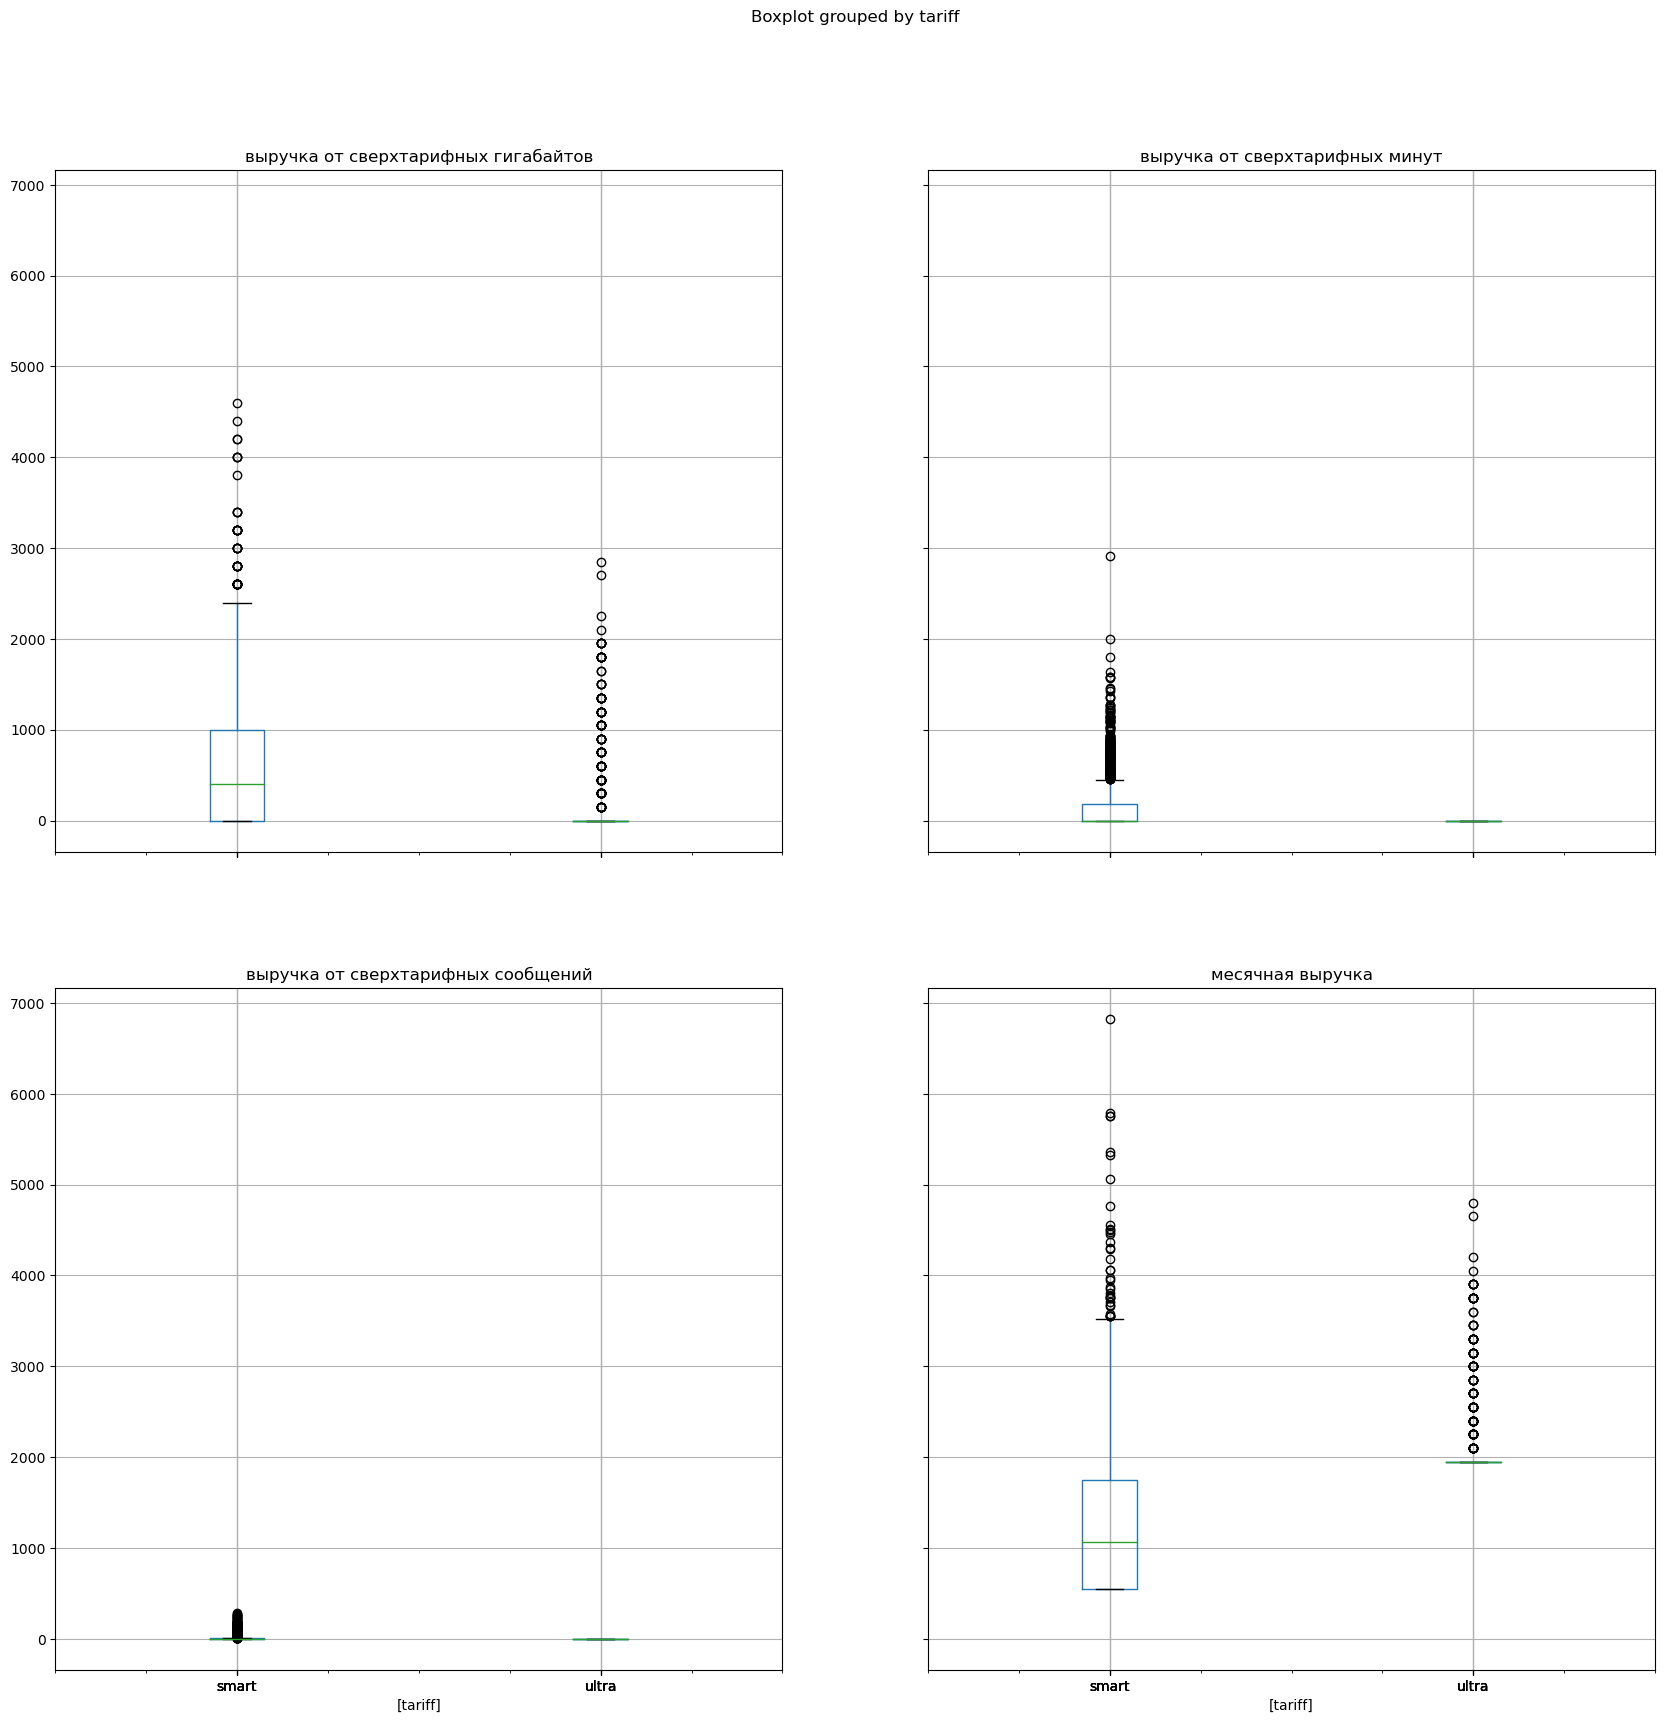

In [96]:
data_analyst[['tariff',
              'выручка от сверхтарифных минут',
              'выручка от сверхтарифных гигабайтов',
              'выручка от сверхтарифных сообщений',
              'месячная выручка']].boxplot(by = 'tariff', figsize=(20,20))
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [97]:
# Соберекм датафрейм необходимых столбцов, поменяем мегабайты --> гигабайты (доп. пакет измеряется в Гб), и проверим на пустые значения

data_analyst_1 = \
data_users_per_month[['tariff',
                       'месяц',
                       'продолжительность звонка (мин)',
                       'использовано интернет трафика (мегабайты)',
                       'кол-во сообщений']]


data_analyst_1['использовано интернет трафика (мегабайты)'] = \
(data_analyst_1['использовано интернет трафика (мегабайты)'] / 1024).astype(int)

data_analyst_1 = data_analyst_1.rename({'использовано интернет трафика (мегабайты)': 'использовано интернет трафика (гигабайты)'},
                                       axis = 1)



data_analyst_1.iloc[:,1:] = data_analyst_1.iloc[:,1:].astype(int)
data_analyst_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   tariff                                     3216 non-null   object
 1   месяц                                      3216 non-null   int32 
 2   продолжительность звонка (мин)             3216 non-null   int32 
 3   использовано интернет трафика (гигабайты)  3216 non-null   int32 
 4   кол-во сообщений                           3216 non-null   int32 
dtypes: int32(4), object(1)
memory usage: 100.5+ KB


C:\Users\oudel\AppData\Local\Temp\ipykernel_5748\888054377.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analyst_1['использовано интернет трафика (мегабайты)'] = \


In [98]:
# Посмотрим на медиану, среднее, диспрерсию и стандартное отклонение по тарифам

data_analyst_1.groupby(['tariff'])['продолжительность звонка (мин)',
                                   'использовано интернет трафика (гигабайты)',
                                   'кол-во сообщений'] \
              .agg(['median', 'mean', 'var', 'std']) \
              .astype(int)

C:\Users\oudel\AppData\Local\Temp\ipykernel_5748\1284427998.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_analyst_1.groupby(['tariff'])['продолжительность звонка (мин)',


продолжительность звонка (мин)                    \
                               median mean     var  std   
tariff                                                    
smart                             434  429   38040  195   
ultra                             531  540  106294  326   

       использовано интернет трафика (гигабайты)               \
                                          median mean var std   
tariff                                                          
smart                                         16   15  33   5   
ultra                                         18   18  96   9   

       кол-во сообщений                 
                 median mean   var std  
tariff                                  
smart                28   33   796  28  
ultra                38   49  2285  47

Text(0.5, 1.0, 'распределение минут в месяц для тарифа SMART')

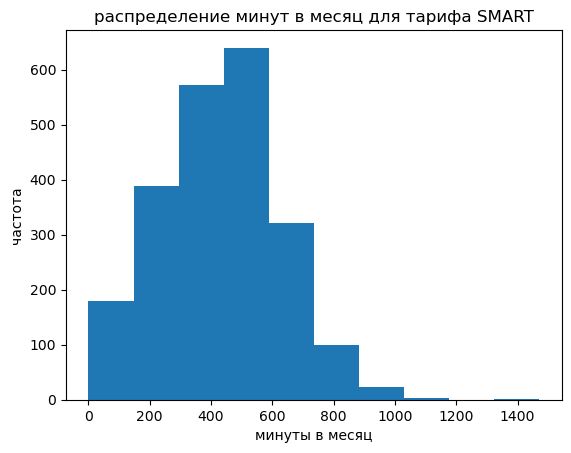

In [99]:
# МИНУТЫ

data_analyst_1[data_analyst_1['tariff'] == 'smart']['продолжительность звонка (мин)'].plot(kind = 'hist')
plt.xlabel('минуты в месяц')
plt.ylabel('частота')
plt.title('распределение минут в месяц для тарифа SMART')

Text(0.5, 1.0, 'распределение минут в месяц для тарифа ULTRA')

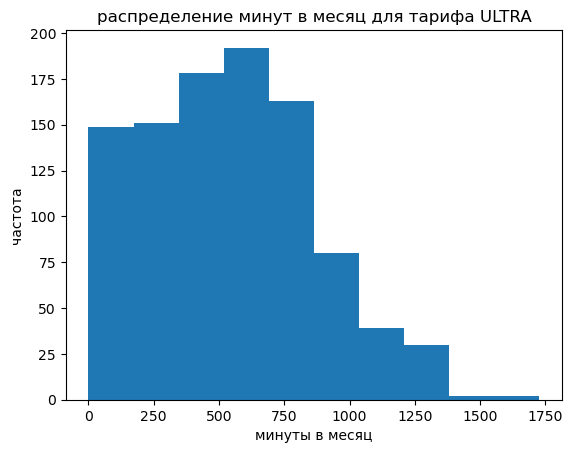

In [100]:
data_analyst_1[data_analyst_1['tariff'] == 'ultra']['продолжительность звонка (мин)'].plot(kind = 'hist')
plt.xlabel('минуты в месяц')
plt.ylabel('частота')
plt.title('распределение минут в месяц для тарифа ULTRA')

In [101]:
tariffs[['tariff_name', 'minutes_included']]

,tariff_name,minutes_included
0,smart,500
1,ultra,3000


In [102]:
data_users_per_month.groupby('tariff')['продолжительность звонка (мин)'].median()

tariff
smart    434.5
ultra    531.5
Name: продолжительность звонка (мин), dtype: float64

сделаем общий вывод после построение все гистограмм распределения

Text(0.5, 1.0, 'распределение гигабайтов в месяц для тарифа SMART')

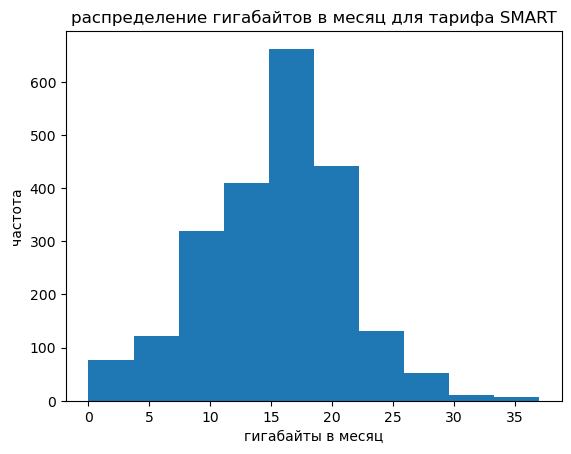

In [103]:
# ИНТЕРНЕТ

data_analyst_1[data_analyst_1['tariff'] == 'smart']['использовано интернет трафика (гигабайты)'].plot(kind = 'hist')
plt.xlabel('гигабайты в месяц')
plt.ylabel('частота')
plt.title('распределение гигабайтов в месяц для тарифа SMART')

Text(0.5, 1.0, 'распределение гигабайтов в месяц для тарифа ULTRA')

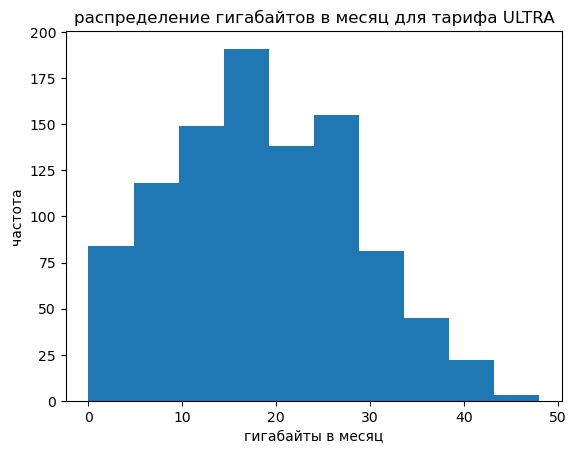

In [104]:
data_analyst_1[data_analyst_1['tariff'] == 'ultra']['использовано интернет трафика (гигабайты)'].plot(kind = 'hist')
plt.xlabel('гигабайты в месяц')
plt.ylabel('частота')
plt.title('распределение гигабайтов в месяц для тарифа ULTRA')

In [105]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs = tariffs.rename({'mb_per_month_included': 'gb_per_month_included'}, axis = 1)
tariffs[['tariff_name', 'gb_per_month_included']]

,tariff_name,gb_per_month_included
0,smart,15.0
1,ultra,30.0


Text(0.5, 1.0, 'распределение кол-ва сообщений в месяц для тарифа SMART')

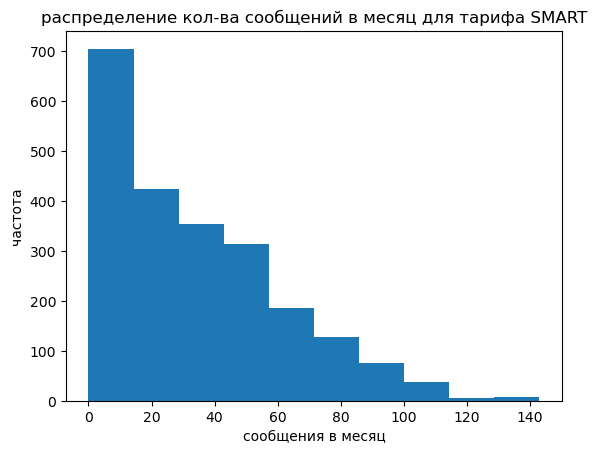

In [106]:
# СООБЩЕНИЯ

data_analyst_1[data_analyst_1['tariff'] == 'smart']['кол-во сообщений'].plot(kind = 'hist')
plt.xlabel('сообщения в месяц')
plt.ylabel('частота')
plt.title('распределение кол-ва сообщений в месяц для тарифа SMART')

Text(0.5, 1.0, 'распределение кол-ва сообщений в месяц для тарифа ULTRA')

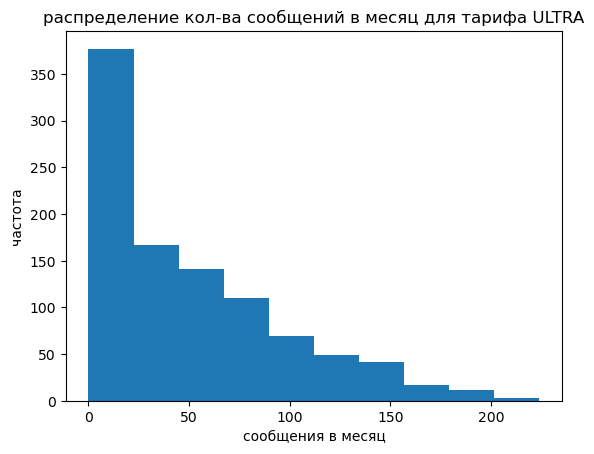

In [107]:
data_analyst_1[data_analyst_1['tariff'] == 'ultra']['кол-во сообщений'].plot(kind = 'hist')
plt.xlabel('сообщения в месяц')
plt.ylabel('частота')
plt.title('распределение кол-ва сообщений в месяц для тарифа ULTRA')

In [108]:
tariffs[['tariff_name', 'messages_included']]

,tariff_name,messages_included
0,smart,50
1,ultra,1000


Вывод по минутам/мес. :

	1) smart : около 450 минут ( в базовом пакете - 500 мин. т.е. в основном не выходят за пределы базового пакета )
	2) ultra : около 550 минут (в базовом пакете - 3000 мин. т.е. также не выходят за пределы базового пакеты )

Вывод по интернету/мес. :

	1) smart : около 16 Гб (базовый пакет - 15 Гб . т.е. в большинстве случаев - докупают 1-2 Гб)
	2) ultra : около 18 Гб ( базовый пакет - 30 Гб. --> не выходят за пределы базового пакета, но разброс большой --> может доходить до 25 Гб )

Вывод по сообщениям/мес.
	
	и smart и ultra показывают одинаковое распределение --> в большинстве случаев, сообщениями не пользуются



Вывод :


    1) пользователи smart часто берут дополнительные пакеты интернета (медианное значение - 400 руб.), практически не берут - доп. минуты и сообщения
    2) пользователи ultra в генеральной совокупности вообще не берут дополнительные пакеты
    3) медианная выручка за smart 1061 руб./мес. (что превышает базовый пакет - 550 руб./мес.)
                            ultra 1950 руб./мес. (что равно стоимости базового пакета)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 4. Проверка гипотез

    1) средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    2) средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

(Пороговое значение alpha задайте самостоятельно)
Поясните: - как вы формулировали нулевую и альтернативную гипотезы - какой критерий использовали для проверки гипотез и почему

#### 1) средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [109]:
# Фильтрация по выбросам и создание отфильтрованного датафрейма


def vibros_identification_create_filter_frame(df,                           
                                              spisok_priznakov):
    
    '''
    df - датафрейм который мы фильтруем по выбросамэ
    spisok_main_priznakov - список названий колонок про которым мы фильтруем выбросы

    Например: 

    spisok_main_priznakov = ['цена на момент снятия с публикации (млн. руб.)',
                         'площадь квартиры в квадратных метрах (м²)',
                         'всего этажей в доме',
                         'высота потолков (м)',
                         'площадь кухни (м²)',
                         'жилая площадь (м²)']
    '''
    
    data_new = df.copy()

    for column_name in spisok_priznakov:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        IQR = q3-q1     # интерквартильный размах 


        filter_for_kolonka = (df[column_name] >= (q1 - 1.5*IQR)) & (df[column_name] <= (q3 + 1.5*IQR))   # Получаем маску признаков без выбросов

        indexes = data_new[filter_for_kolonka].index
        data_new = data_new.loc[indexes] 
        
    return data_new         # Возвращает отфильтрованный датафрейм (отфильтрованный по выбросам)

Т.к. выборки независимые, воспользуемся t-критерием Стьюдента. Будем проверять равенство средних значений в выборках.

Формулирование гипотез:

    1) H0: средняя выручка пользователей тарифа smart и ultra не различаются
    2) H1: средняя выручка пользователей тарифа smart и ultra различаются

In [110]:
# Фильтрация по выбросам и создание отфильтрованного датафрейма



def vibros_identification_create_filter_frame(df,                           
                                              spisok_main_priznakov):
    
    '''
    df - датафрейм который мы фильтруем по выбросамэ
    spisok_main_priznakov - список названий колонок про которым мы фильтруем выбросы

    Например: 

    spisok_main_priznakov = ['цена на момент снятия с публикации (млн. руб.)',
                         'площадь квартиры в квадратных метрах (м²)',
                         'всего этажей в доме',
                         'высота потолков (м)',
                         'площадь кухни (м²)',
                         'жилая площадь (м²)']
    '''
    
    data_new = df.copy()

    for column_name in spisok_main_priznakov:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        IQR = q3-q1     # интерквартильный размах 


        filter_for_kolonka = (df[column_name] >= (q1 - 1.5*IQR)) & (df[column_name] <= (q3 + 1.5*IQR))   # Получаем маску признаков без выбросов

        indexes = data_new[filter_for_kolonka].index
        data_new = data_new.loc[indexes] 
        
    return data_new         # Возвращает отфильтрованный датафрейм (отфильтрованный по выбросам)





data_analyst_ultra_clear = vibros_identification_create_filter_frame(data_analyst[data_analyst['tariff'] == 'ultra'],
                                                                     ['месячная выручка'])

data_analyst_smart_clear = vibros_identification_create_filter_frame(data_analyst[data_analyst['tariff'] == 'smart'],
                                                                     ['месячная выручка'])

In [111]:
# используем чистые датафреймы data_analyst_clear

data_analyst_ultra_clear = data_analyst_ultra_clear['месячная выручка']
data_analyst_smart_clear = data_analyst_smart_clear['месячная выручка']

alpha = 0.05

print(f'Дисперсия 1-ой выборки: {np.var(data_analyst_smart_clear)}')
print(f'Дисперсия 2-ой выборки: {np.var(data_analyst_ultra_clear)}')
print('\n')

results = st.ttest_ind(data_analyst_ultra_clear, data_analyst_smart_clear, equal_var=False)
p_value = results.pvalue

if alpha > p_value:
    print('отвергаем H0')
else:
    print('При выбранном alpha - H0 не отвергаем')

print('p-значение ', p_value)

Дисперсия 1-ой выборки: 533704.5601921247
Дисперсия 2-ой выборки: 0.0


отвергаем H0
p-значение  6.84826045683668e-308


C:\Users\oudel\AppData\Local\Temp\ipykernel_5748\3436580278.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results = st.ttest_ind(data_analyst_ultra_clear, data_analyst_smart_clear, equal_var=False)


Мизерная вероятность, что результаты случайны --> средняя выручка пользователей тарифа smart и ultra РАЗЛИЧАЮТСЯ

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 2) средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


Формулировка гипотез:

            1) H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов (т.е. они равны)
            2) H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов (т.е. они не равны)


In [112]:
# добаляем данные о населенном пункте

data_analyst['город/населенный пункт'] = data_users_per_month['city']
data_analyst.info() # проверка на пустые значения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   user_id                              3216 non-null   int32 
 1   tariff                               3216 non-null   object
 2   месяц                                3216 non-null   int32 
 3   rub_monthly_fee                      3216 non-null   int32 
 4   выручка от сверхтарифных минут       3216 non-null   int32 
 5   выручка от сверхтарифных гигабайтов  3216 non-null   int32 
 6   выручка от сверхтарифных сообщений   3216 non-null   int32 
 7   месячная выручка                     3216 non-null   int32 
 8   сверхтарифная выручка                3216 non-null   int32 
 9   город/населенный пункт               3216 non-null   object
dtypes: int32(8), object(2)
memory usage: 175.9+ KB


In [113]:
# выделяем нужные нам объекты Series

data_MSK = data_analyst[data_analyst['город/населенный пункт'] == 'Москва']['месячная выручка']
data_NOT_MSK = data_analyst[data_analyst['город/населенный пункт'] != 'Москва']['месячная выручка']

# Очищаем данные от выбросов

data_MSK_clear = vibros_identification_create_filter_frame(pd.DataFrame(data_MSK),
                                                           ['месячная выручка'])
data_NOT_MSK_clear = vibros_identification_create_filter_frame(pd.DataFrame(data_NOT_MSK),
                                                               ['месячная выручка'])

# Проверяем близость дисперсий наших выборок ( для критерия Стьюдента это важно, если они сильно различны --> применим критерий Уэлча)

print(np.var(data_MSK_clear))
print(np.var(data_NOT_MSK_clear))       # Дисперсии близки --> equal_var = True

месячная выручка    508490.364945
dtype: float64
месячная выручка    552846.296634
dtype: float64


In [114]:
alpha = 0.05

results = st.ttest_ind(data_MSK_clear, data_NOT_MSK_clear)
p_value = results.pvalue

if alpha > p_value:
    print('отвергаем H0')
else:
    print('При выбранном alpha - H0 не отвергаем')

print('p-значение' , p_value)

При выбранном alpha - H0 не отвергаем
p-значение [0.31102611]


С вероятностью 31% результат мог быть получен случайно
Средняя выручка пользователей из Москвы практически не отличается от выручки пользователей из других регионов (т.е. они равны)

----------------------------------------------------------------------------------------------------------------------

## 5. Результаты исследования
- Общие выводы
- Рекомендации

#### Числовой итог: 



	1) Количество пользователей по каждому тарифу: "smart" : 2230  ( тарифная плата 550 руб. )
						       "ultra" : 986   ( тарифная плата 1950 руб. )


	2) Выручка от сверхтарифных минут, SMS, интернет (медианное значение):

		2.1) SMART:
				минуты : 	0 руб.
				SMS:     	0 руб.  
				интернет:	400 руб.

		2.2) ULTRA: все по 0 руб.

	3) пользователи smart часто берут дополнительные пакеты интернета (медианное значение - 400 руб.), практически не берут - доп. минуты и сообщения
	4) пользователи ultra в генеральной совокупности вообще не берут дополнительные пакеты
	5) медианная выручка за smart 1061 руб./мес. (что превышает базовый пакет - 550 руб./мес.)
                            ultra 1950 руб./мес. (что равно стоимости базового пакета)



#### Вывод:

	1) Выручка в Москве и в регионах не отличается ( она интуитивно и недолжна была отличаться: тариф - фиксированная цена для всех, а потребности в звонках, интернете врятли зависят от географического расположения )
	2) СМС никто не использует (есть мессенджеры, кот. базируются на интернет трафике)
	3) Выручка от разных тарифов - разная






#### Рекомендации :



	1) Заполнение данных о итернет трафике в гигабайтах - во избежании разногласий данных (доп. интернет пакет продается в Гб )
	2) Оптимизация тарифов под пользователей : 1) Скрутить на 0 сообщения (или 10-15 шт.)
					     	   				   2) 17 Гб интернета (вместо 15 Гб в smart) и т.д. - но появляется проблема цены ( необходимо адаптировать и ее без потери прибыли )
	3) Как доп. функцию  - Возможность переделывать не использованные SMS/минуты переделывать в Гб 
	   (но опять же без потери прибыли либо исп. это как маркетинговый ход --> на привлечение новых пользователей)


